In [1]:
!pip install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 19.3 MB/s eta 0:00:00


In [2]:
!pip install SimpleITK

In [3]:
!pip install k3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [4]:
import k3d
import pandas as pd
import numpy as np
import os
import glob
import SimpleITK as sitk
import json
import matplotlib.pyplot as plt
from PIL import Image
import torchio as tio
from pathlib import Path
import shutil

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
seg_with_loc = ['1.2.826.0.1.3680043.8.498.10035643165968342618460849823699311381',
 '1.2.826.0.1.3680043.8.498.10076056930521523789588901704956188485',
 '1.2.826.0.1.3680043.8.498.10188636688783982623025997809119805350',
 '1.2.826.0.1.3680043.8.498.10410600166004340343973545138447283460',
 '1.2.826.0.1.3680043.8.498.10540586847553109495238524904638776495',
 '1.2.826.0.1.3680043.8.498.10929608782694347957516071062422315982',
 '1.2.826.0.1.3680043.8.498.10935907012185032169927418164924236382',
 '1.2.826.0.1.3680043.8.498.11140496970152788589837488009637704168',
 '1.2.826.0.1.3680043.8.498.11163718560814217911019576488539324434',
 '1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182',
 '1.2.826.0.1.3680043.8.498.11447542941959800581541313722844637822',
 '1.2.826.0.1.3680043.8.498.11504459395565711149380261095223705023',
 '1.2.826.0.1.3680043.8.498.11557464859397815362951522785245632020',
 '1.2.826.0.1.3680043.8.498.11624217734793256238140178687655335066',
 '1.2.826.0.1.3680043.8.498.11639720015527164474926997755882681707',
 '1.2.826.0.1.3680043.8.498.11641438607169452758239778414614826230',
 '1.2.826.0.1.3680043.8.498.11821446229980500432989393232863242415',
 '1.2.826.0.1.3680043.8.498.11924949819899884502738782576851659426',
 '1.2.826.0.1.3680043.8.498.11938739392606296532297884225608408867',
 '1.2.826.0.1.3680043.8.498.11999987145696510072091906561590137848',
 '1.2.826.0.1.3680043.8.498.12132622846836853200891705613461466627',
 '1.2.826.0.1.3680043.8.498.12180351938456969219537687190067731477',
 '1.2.826.0.1.3680043.8.498.12226380705607315060235896835122737788',
 '1.2.826.0.1.3680043.8.498.12271269630687930751200307891697907423',
 '1.2.826.0.1.3680043.8.498.12427930128533148989436011949311706348',
 '1.2.826.0.1.3680043.8.498.12709802490782896897031103447163443069',
 '1.2.826.0.1.3680043.8.498.12773309706735630359315214846273921394',
 '1.2.826.0.1.3680043.8.498.12792960392435514526913217158720555996',
 '1.2.826.0.1.3680043.8.498.12812390336793304037901571645929430100',
 '1.2.826.0.1.3680043.8.498.12873050136415197430227722045995986358',
 '1.2.826.0.1.3680043.8.498.12888459003897616398890411591973176636',
 '1.2.826.0.1.3680043.8.498.12896910506681881306246412668919668702',
 '1.2.826.0.1.3680043.8.498.12898332622076283462996059479076432725',
 '1.2.826.0.1.3680043.8.498.12904246053955178641505906243733756576',
 '1.2.826.0.1.3680043.8.498.12914952223659958493995413641114579279',
 '1.2.826.0.1.3680043.8.498.13128656559176299272467358793386537400',
 '1.2.826.0.1.3680043.8.498.13359737970612926494907045108541390310',
 '1.2.826.0.1.3680043.8.498.13789305723712362238118274295587312089',
 '1.2.826.0.1.3680043.8.498.14375161350968928494386548917647435597',
 '1.2.826.0.1.3680043.8.498.15111820005882064793593034423469604305',
 '1.2.826.0.1.3680043.8.498.15412988336827906186857260013885503248',
 '1.2.826.0.1.3680043.8.498.15777485274723969278718374949878560903',
 '1.2.826.0.1.3680043.8.498.16386250344855221757144432829845114733',
 '1.2.826.0.1.3680043.8.498.16984390277144742906667579449023180512',
 '1.2.826.0.1.3680043.8.498.17415277997649872560329721717694101082',
 '1.2.826.0.1.3680043.8.498.19915189891686122627071348069843885714',
 '1.2.826.0.1.3680043.8.498.21004106426734635526381567602936015568',
 '1.2.826.0.1.3680043.8.498.23047023542526806696555440426928375679',
 '1.2.826.0.1.3680043.8.498.23055827202917388669053993133576833763',
 '1.2.826.0.1.3680043.8.498.24023896361071846724104915533800547445',
 '1.2.826.0.1.3680043.8.498.24587963869128721940158079207224095554',
 '1.2.826.0.1.3680043.8.498.24941924992372724575490063788348447936',
 '1.2.826.0.1.3680043.8.498.27693546360513068451517048347207987807',
 '1.2.826.0.1.3680043.8.498.27857528510177554953207997404329765760',
 '1.2.826.0.1.3680043.8.498.28722601444191262075880952461419085326',
 '1.2.826.0.1.3680043.8.498.31897325247898403027455884342546675049',
 '1.2.826.0.1.3680043.8.498.32250259987224176174516959348681094310',
 '1.2.826.0.1.3680043.8.498.34439485184360273751379923196589017042',
 '1.2.826.0.1.3680043.8.498.35327124657045713676192746001247576881',
 '1.2.826.0.1.3680043.8.498.35378146560080702211693278243609271022',
 '1.2.826.0.1.3680043.8.498.36205761227502095958293403225062705137',
 '1.2.826.0.1.3680043.8.498.36516744229109249667702200145077143886',
 '1.2.826.0.1.3680043.8.498.36563348911961346172279351080943665664',
 '1.2.826.0.1.3680043.8.498.36928611823925733133253145871406408988',
 '1.2.826.0.1.3680043.8.498.37086262716517957668471635372810376638',
 '1.2.826.0.1.3680043.8.498.38245669369430321272819874468980907728',
 '1.2.826.0.1.3680043.8.498.38904475631578710113273863766282479811',
 '1.2.826.0.1.3680043.8.498.39640919070091958876744231048011388614',
 '1.2.826.0.1.3680043.8.498.40402571428459178954472078378902050472',
 '1.2.826.0.1.3680043.8.498.42092450058597943280470345107435382425',
 '1.2.826.0.1.3680043.8.498.42672154202952548010999212369080894652',
 '1.2.826.0.1.3680043.8.498.42933230680553480084056393591634621848',
 '1.2.826.0.1.3680043.8.498.43495968397556043698567120038117641587',
 '1.2.826.0.1.3680043.8.498.43536331102142701793144520859521601945',
 '1.2.826.0.1.3680043.8.498.47622062519393262272120105951011625928',
 '1.2.826.0.1.3680043.8.498.47802313478131783077762931281303667601',
 '1.2.826.0.1.3680043.8.498.47887093599897399482447594752785316358',
 '1.2.826.0.1.3680043.8.498.49640345168968922611291772802640560828',
 '1.2.826.0.1.3680043.8.498.49718418682238683779854914910561017368',
 '1.2.826.0.1.3680043.8.498.50241233088534910114736887318508484246',
 '1.2.826.0.1.3680043.8.498.50268462808449401128173812870329002342',
 '1.2.826.0.1.3680043.8.498.50275403170194436966991630938339966596',
 '1.2.826.0.1.3680043.8.498.50369188120242587742908379292729868174',
 '1.2.826.0.1.3680043.8.498.52363954882447190271251269039176558430',
 '1.2.826.0.1.3680043.8.498.53947155422591684879953627516013605305',
 '1.2.826.0.1.3680043.8.498.54865110953409154322874363435644372368',
 '1.2.826.0.1.3680043.8.498.55051557363776453883164282380323354147',
 '1.2.826.0.1.3680043.8.498.55520651046049733868642268089599441721',
 '1.2.826.0.1.3680043.8.498.56109731607412273442907651635753012241',
 '1.2.826.0.1.3680043.8.498.56479623144539472445940519727300319231',
 '1.2.826.0.1.3680043.8.498.56867346585094457716984380929416039466',
 '1.2.826.0.1.3680043.8.498.58839417089022860359638460482101293080',
 '1.2.826.0.1.3680043.8.498.61152918475243358118286003299125054478',
 '1.2.826.0.1.3680043.8.498.65011208113835286935212080363533579671',
 '1.2.826.0.1.3680043.8.498.65654303333996310125136982540737772052',
 '1.2.826.0.1.3680043.8.498.66341469849558089736451534296312923277',
 '1.2.826.0.1.3680043.8.498.67256382079119118825371537284628604044',
 '1.2.826.0.1.3680043.8.498.68161752706586485995657009830735928975',
 '1.2.826.0.1.3680043.8.498.68276712082656957005274595949315894066',
 '1.2.826.0.1.3680043.8.498.68356160898101066850726244725552676010',
 '1.2.826.0.1.3680043.8.498.68654901185438820364160878605611510817',
 '1.2.826.0.1.3680043.8.498.68709340002397343932718258443293606585',
 '1.2.826.0.1.3680043.8.498.69401690945645968072368812538918487252',
 '1.2.826.0.1.3680043.8.498.69568746915553014138135720681936366640',
 '1.2.826.0.1.3680043.8.498.70243202242722756546202582478829903758',
 '1.2.826.0.1.3680043.8.498.71796601538792777580416179841706319140',
 '1.2.826.0.1.3680043.8.498.72679260079421518845786364620483278827',
 '1.2.826.0.1.3680043.8.498.73820261697830420042473892884688067574',
 '1.2.826.0.1.3680043.8.498.75016896260047968433534297207591136672',
 '1.2.826.0.1.3680043.8.498.75294325392457179365040684378207706807',
 '1.2.826.0.1.3680043.8.498.75798029534455454939797323020706657426',
 '1.2.826.0.1.3680043.8.498.77257791208759842602760935296318202703',
 '1.2.826.0.1.3680043.8.498.79099213587801933936080747802403048718',
 '1.2.826.0.1.3680043.8.498.79942836660118710928733936389534291771',
 '1.2.826.0.1.3680043.8.498.80048101091444895066772572129871971243',
 '1.2.826.0.1.3680043.8.498.80114244849666367523293067199486077713',
 '1.2.826.0.1.3680043.8.498.80190289468142266421549927426167714158',
 '1.2.826.0.1.3680043.8.498.80461517820710375402982229582943598734',
 '1.2.826.0.1.3680043.8.498.81098958708250149437576237811675033160',
 '1.2.826.0.1.3680043.8.498.82247540847692847800462620079965863384',
 '1.2.826.0.1.3680043.8.498.82641698422464356104108563099150990855',
 '1.2.826.0.1.3680043.8.498.84908441442551598157537604822760711232',
 '1.2.826.0.1.3680043.8.498.84955070686251417902923705821409495324',
 '1.2.826.0.1.3680043.8.498.85709849872024108265120796348331660195',
 '1.2.826.0.1.3680043.8.498.86822530556046989269633487715061058236',
 '1.2.826.0.1.3680043.8.498.87794163393266428648659243169230666286',
 '1.2.826.0.1.3680043.8.498.88044882887797890422716086408658477347',
 '1.2.826.0.1.3680043.8.498.88512241250207324783783101806489145581',
 '1.2.826.0.1.3680043.8.498.88662334466087798807484415780594176763',
 '1.2.826.0.1.3680043.8.498.88739296218460643753583291722714541935',
 '1.2.826.0.1.3680043.8.498.88905360377095450551559885185901908404',
 '1.2.826.0.1.3680043.8.498.89421386426320866039573378582181968701',
 '1.2.826.0.1.3680043.8.498.89990837914171555676446644356114244393',
 '1.2.826.0.1.3680043.8.498.90015157820692758596783999454928886688',
 '1.2.826.0.1.3680043.8.498.90168683694094931217787644438845074017',
 '1.2.826.0.1.3680043.8.498.92418959634964175917370213963992652610',
 '1.2.826.0.1.3680043.8.498.92543328866053664733167983708344898988',
 '1.2.826.0.1.3680043.8.498.92773748942952645243074808740855383414',
 '1.2.826.0.1.3680043.8.498.96218477847514569819859044953648183121',
 '1.2.826.0.1.3680043.8.498.97057911327885502714270510313728134927',
 '1.2.826.0.1.3680043.8.498.97256479550884529885940791074752719030',
 '1.2.826.0.1.3680043.8.498.98123758735027035609698227781754927939',
 '1.2.826.0.1.3680043.8.498.98133633346919790888527055899070500258']

In [7]:
organ2label = {
  "Other Posterior Circulation" : 1,
  "Basilar Tip" : 2,
  "Right Posterior Communicating Artery" : 3,
  "Left Posterior Communicating Artery" : 4,
  "Right Infraclinoid Internal Carotid Artery" : 5,
  "Left Infraclinoid Internal Carotid Artery" : 6,
  "Right Supraclinoid Internal Carotid Artery" : 7,
  "Left Supraclinoid Internal Carotid Artery" : 8,
  "Right Middle Cerebral Artery" : 9,
  "Left Middle Cerebral Artery" : 10,
  "Right Anterior Cerebral Artery" : 11,
  "Left Anterior Cerebral Artery" : 12,
  "Anterior Communicating Artery" : 13
}

In [8]:
def resample_img(img, is_mask=False):
    if is_mask:
        resample = tio.Resample((1, 1, 1), label_interpolation='nearest', image_interpolation='nearest')
    else:
        resample = tio.Resample((1, 1, 1))
    return resample(img)

def crop_or_pad_img(img, i=5):
    crop_pad = tio.CropOrPad((256, 256, i))
    return crop_pad(img)

def image_clipping(img_arr, modality):
    if modality == 'CTA':
        vmin = -100
        vmax = 600
        return np.clip(img_arr, vmin, vmax)

    p5 = np.percentile(img_arr, 5)
    p95 = np.percentile(img_arr, 95)

    vmin = p5 * 2
    vmax = min(p95 * 2, img_arr.max())

    return np.clip(img_arr, vmin, vmax)

def get_physical_point_and_location(img, df_row):
    xy = df_row['coordinates']
    loc = df_row['location']

    x = json.loads(xy.replace("\'", "\""))['x']
    y = json.loads(xy.replace("\'", "\""))['y']

    return x, y, loc

def preprocess_img(img):
    img = np.transpose(img, (1, 2, 0))
    img = np.expand_dims(img, axis=0)
    img = crop_or_pad_img(img)
    img = np.squeeze(img, axis=0)
    return img

In [9]:
prefix = '/content/drive/Shareddrives/DATA/rsna-intracranial-aneurysm-detection/'
series_path = os.path.join(prefix, 'series')
segmentations_path = os.path.join(prefix, 'segmentations')

In [10]:
localizers = pd.read_csv(os.path.join(prefix,'train_localizers.csv'))
train_df = pd.read_csv(os.path.join(prefix, 'train.csv'))

In [11]:
localizers.columns

Index(['SeriesInstanceUID', 'SOPInstanceUID', 'coordinates', 'location'], dtype='object')

In [12]:
save_folder = Path('/content/drive/Shareddrives/DATA/g143_review/D_Szyjka/train_images_and_labels')
save_folder.mkdir(exist_ok=True)

In [13]:
more_then_1_loc = localizers.groupby('SeriesInstanceUID')['location'].nunique()
more_then_1_loc = more_then_1_loc[more_then_1_loc > 1]
more_then_1_loc

,location
SeriesInstanceUID,
1.2.826.0.1.3680043.8.498.10035643165968342618460849823699311381,3
1.2.826.0.1.3680043.8.498.10320104854524208588853957389202003973,2
1.2.826.0.1.3680043.8.498.10516336661180183966126480937598074106,2
1.2.826.0.1.3680043.8.498.10602156717395509282545203380100998253,2
1.2.826.0.1.3680043.8.498.10633029764731181926825032640422192656,3
...,...
1.2.826.0.1.3680043.8.498.98123758735027035609698227781754927939,2
1.2.826.0.1.3680043.8.498.98957399604279377953229946809975291274,2
1.2.826.0.1.3680043.8.498.99028068919105186302294079606577228686,5


In [14]:
cta_x, mr_x, cta_y, mr_y = [], [], [], []

for i, ser in enumerate(seg_with_loc):
    if i % 10 == 0:
        print(i)

    ser_modality = train_df.loc[train_df['SeriesInstanceUID'] == ser]['Modality'].iloc[0]

    if ser_modality == 'CTA':
        x_lst = cta_x
        y_lst = cta_y
    else:
        x_lst = mr_x
        y_lst = mr_y

    seg_path = os.path.join(segmentations_path, f'{ser}_cowseg.nii')
    seg = sitk.ReadImage(seg_path)
    seg = sitk.DICOMOrient(seg)
    seg = resample_img(seg, is_mask=True)
    seg_arr = sitk.GetArrayFromImage(seg)

    nii_path = os.path.join(segmentations_path, f'{ser}.nii')
    nii_img = sitk.ReadImage(nii_path)
    nii_img = sitk.DICOMOrient(nii_img)
    nii_img = resample_img(nii_img)
    nii_arr = sitk.GetArrayFromImage(nii_img)

    sops = localizers.loc[localizers['SeriesInstanceUID'] == ser]

    ser_i = []

    for idx, row in sops.iterrows():
        slice_path = os.path.join(series_path, row.SeriesInstanceUID, f'{row.SOPInstanceUID}.dcm')
        dcm_img = sitk.ReadImage(slice_path)

        x, y, loc = get_physical_point_and_location(dcm_img, row)
        x, y, z = np.array(dcm_img.TransformContinuousIndexToPhysicalPoint((x, y, 0)))
        label = organ2label[loc]

        nii_k, nii_j, nii_i = nii_img.TransformPhysicalPointToIndex((x, y, z))
        ser_i.append(nii_i)

        stacked = nii_arr[nii_i - 2 : nii_i + 3, :, :]
        seg_extract = seg_arr[nii_i - 2 : nii_i + 3, :, :]

        mask = preprocess_img(seg_extract)
        mask = np.where(mask > 0, mask, 0)

        stacked = preprocess_img(stacked)
        stacked = image_clipping(stacked, ser_modality)
        stacked = np.concatenate((stacked, mask), axis=-1)

        x_lst.append(stacked)
        y_lst.append(label)

    min_i = min(ser_i)
    max_i = max(ser_i)

    # no aneurysm
    try:
        under_aneurysm = nii_arr[min_i - 9 : min_i - 4, :, :]
        under_aneurysm = preprocess_img(under_aneurysm)
        under_aneurysm = image_clipping(under_aneurysm, ser_modality)

        mask = seg_arr[min_i - 9 : min_i - 4, :, :]
        mask = preprocess_img(mask)
        mask = np.where(mask > 0, mask, 0)

        under_aneurysm = np.concatenate((under_aneurysm, mask), axis=-1)

        x_lst.append(under_aneurysm)
        y_lst.append(0)

    except IndexError:
        pass

    try:
        over_aneurysm = nii_arr[max_i + 5 : max_i + 10, :, :]
        over_aneurysm = preprocess_img(over_aneurysm)
        over_aneurysm = image_clipping(over_aneurysm, ser_modality)

        mask = seg_arr[max_i + 5 : max_i + 10, :, :]
        mask = preprocess_img(mask)
        mask = np.where(mask > 0, mask, 0)

        over_aneurysm = np.concatenate((over_aneurysm, mask), axis=-1)

        x_lst.append(over_aneurysm)
        y_lst.append(0)

    except IndexError:
        pass

cta_x = np.stack(cta_x, axis=0)
mr_x = np.stack(mr_x, axis=0)
cta_y = np.array(cta_y)
mr_y = np.array(mr_y)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


Manual data review


In [15]:
def get_idx():
    i = 0
    while True:
        yield i
        i += 1

In [80]:
def draw_img(img):
    fix, ax = plt.subplots(2, 5, figsize=(30, 5))

    ax[0, 0].imshow(img[:, :, 0], cmap='gray')
    ax[0, 1].imshow(img[:, :, 1], cmap='gray')
    ax[0, 2].imshow(img[:, :, 2], cmap='gray')
    ax[0, 3].imshow(img[:, :, 3], cmap='gray')
    ax[0, 4].imshow(img[:, :, 4], cmap='gray')

    ax[1, 0].imshow(img[:, :, 5], cmap='gray')
    ax[1, 1].imshow(img[:, :, 6], cmap='gray')
    ax[1, 2].imshow(img[:, :, 7], cmap='gray')
    ax[1, 3].imshow(img[:, :, 8], cmap='gray')
    ax[1, 4].imshow(img[:, :, 9], cmap='gray')

    plt.show()

In [17]:
idx_gen = get_idx()

In [190]:
cta_idx = next(idx_gen)

while cta_idx < cta_y.shape[0] and cta_y[cta_idx] > 0:
    cta_idx = next(idx_gen)

if cta_idx < cta_y.shape[0] and cta_y[cta_idx] == 0:
    draw_img(cta_x[cta_idx])
    print(f'class: {cta_y[cta_idx]}')
    print(f'index: {cta_idx}')

print('CTA removing done')

CTA removing done


CHANGED OR REMOVED DATA INDICES IN CTA IMAGES:

1.  index 17 - Still aneurysm ispresent -> changed to 13
2. index 67 - No circle of willis  -> removed
3. index 71 - No circle of willis  -> removed
4. index 69 - Invalid data -> removed
5. index 68 - Invalid data -> removed
6. index 74 - No circle of willis -> removed
7. index 82 - Still aneurysm present -> changed to 10
8. index 83 - Still aneurysm present -> changed to 10
9. index 114 - Still aneurysm present -> changed to 13
10. index 115 - not sure it's not aneurysm -> removed
11. index 118 - not sure it's not aneurysm -> removed
12. index 139 - still aneurysm is present -> changed to 1
13. index 140 - still aneurysm is present -> changed to 1
14. index 195 - no circle of willis -> removed
15. index 217 - still aneurysm is present -> changed to 5
16. index 218 - still aneurysm is present -> changed to 5

In [191]:
cta_y[[17, 114]] = 13
cta_y[[82, 83]] = 10
cta_y[[139, 140]] = 1
cta_y[[217, 218]] = 5
cta_x = np.delete(cta_x, [67, 71, 69, 68, 74, 115, 118, 195])
cta_y = np.delete(cta_y, [67, 71, 69, 68, 74, 115, 118, 195])

In [193]:
#cta_y = np.delete(cta_y, [67, 71, 69, 68, 74, 115, 118, 195])

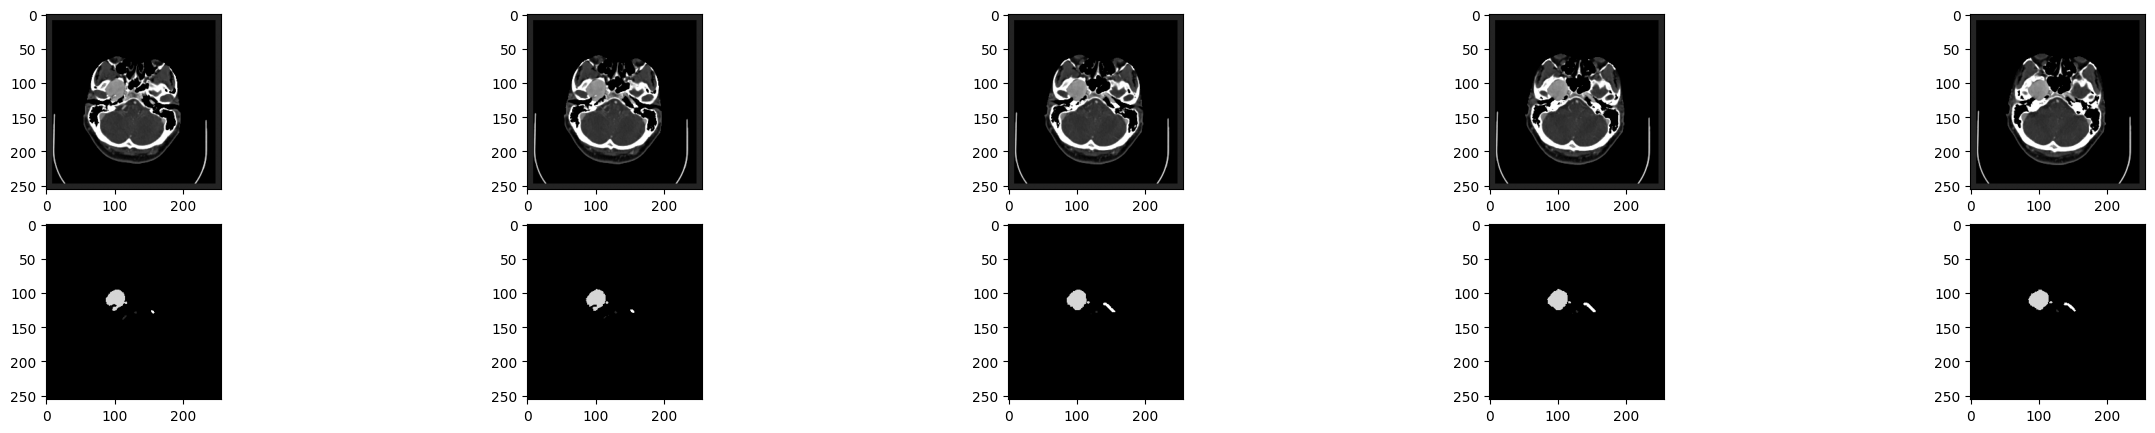

np.int64(5)

In [181]:
draw_img(cta_x[216])
cta_y[216]

In [ ]:
idx_gen = get_idx()

In [ ]:
mr_idx = next(idx_gen)

if mr_idx <= mr_y.shape[0] and mr_y[mr_idx] == 0:
    draw_img(mr_x, mr_idx)
else:
    print('MR removing done')

CHANGED OR REMOVED DATA INDICES IN MR IMAGES:

In [ ]:
draw_img(mr_x[216])
mr_y[216]

In [ ]:
np.save(os.path.join(save_folder, 'non_cta_images.npy'), mr_x)
np.save(os.path.join(save_folder, 'non_cta_labels.npy'), mr_y)
np.save(os.path.join(save_folder, 'cta_images.npy'), cta_x)
np.save(os.path.join(save_folder, 'cta_labels.npy'), cta_y)

In [ ]:
len(os.listdir(save_folder))

468

In [ ]:
#shutil.rmtree(save_folder)